<a href="https://colab.research.google.com/github/EN-03/Repository_1/blob/main/Skill_Sem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')

# For x = df.iloc[:, :-1] (Features/Independent Variables)

df: Your DataFrame (table of data).

iloc: Selects data by position (rows & columns).

[:, :-1]:
: → Select all rows.
:-1 → Select all columns except the last one


---

**Purpose: Stores all columns except the last one in x (features for prediction).**


---


# For y = df.iloc[:, -1] (Target/Dependent Variable)

df: Your DataFrame.

iloc: Selects data by position.

[:, -1]:
: → Select all rows.
-1 → Select only the last column.

Purpose: Stores the last column in y (target variable to predict).


---


Summary
x: Contains features (used to predict).
y: Contains target (what we predict).
Common preprocessing step in machine learning.




In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/diabetes.csv') # load dataset
# Extract features and target
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
display(df.info())
display(df.describe())
display(df.size)
display(df.shape)
display(df.isna().sum())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


6912

(768, 9)

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


<Axes: >

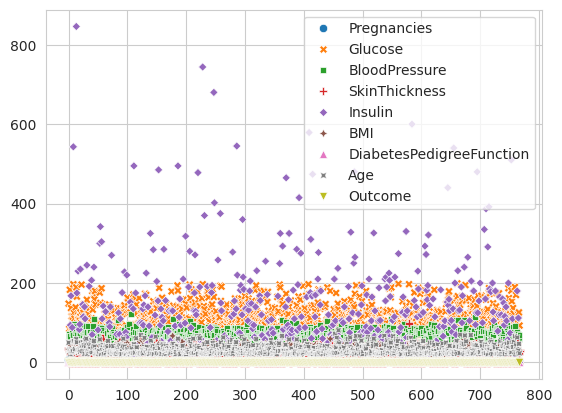

In [ ]:
sns.scatterplot(df)

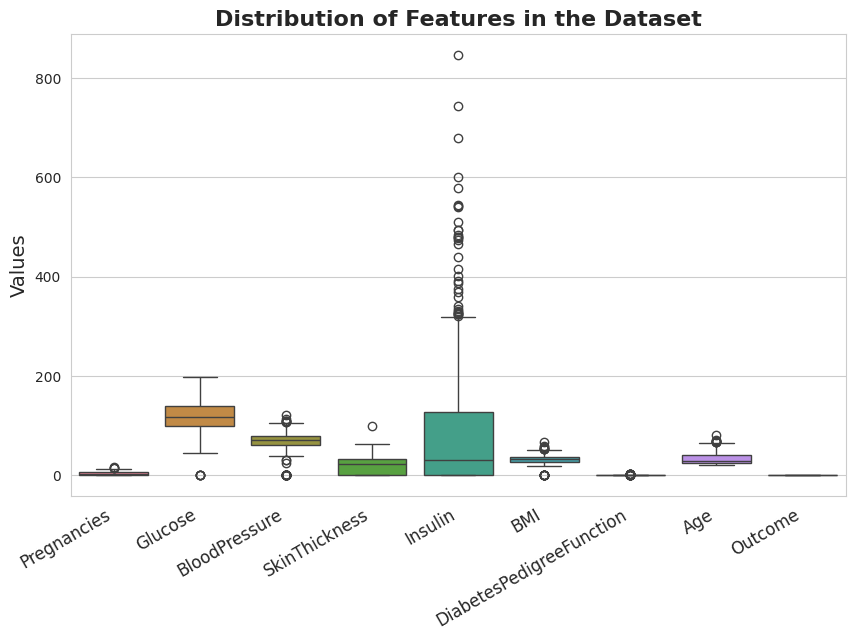

In [ ]:
# Set the style for a clean look
sns.set_style("whitegrid")

# Create the box plot with better aesthetics
plt.figure(figsize=(10, 6))  # Set figure size
ax = sns.boxplot(data=df, palette="husl")  # 'husl' gives distinct colors

# Improve x-axis labels
plt.xticks(rotation=30, ha="right", fontsize=12)  # Rotate labels for readability

# Improve y-axis label
plt.ylabel("Values", fontsize=14)

# Improve title
plt.title("Distribution of Features in the Dataset", fontsize=16, fontweight='bold')

# Show the plot
plt.show()

In [ ]:
def remove_outliers(df):
    df_clean = df.copy()
    initial_rows = len(df_clean)

    # Remove outliers for each numeric column
    for col in df_clean.select_dtypes(exclude=['object']).columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        df_clean = df_clean[(df_clean[col] >= Q1 - 1.5 * IQR) &
                           (df_clean[col] <= Q3 + 1.5 * IQR)]

    # Calculate number of removed rows
    removed = initial_rows - len(df_clean)

    # Print removal statistics
    print(f"Initial rows: {initial_rows}")
    print(f"Rows after removal: {len(df_clean)}")
    print(f"Removed {removed} outliers ({(removed/initial_rows)*100:.2f}% of data)")

    return df_clean

# Apply outlier removal
data = remove_outliers(df)

Initial rows: 768
Rows after removal: 636
Removed 132 outliers (17.19% of data)


In [ ]:
numeric_features = data.select_dtypes(exclude=['object']).columns
categorical_features = data.select_dtypes(include=['object']).columns

print("\nNumeric Features:", list(numeric_features))
print("Categorical Features:", list(categorical_features))


Numeric Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
Categorical Features: []


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8246753246753247

In [ ]:
def scaled_data(df):
    df_copy = df.copy()
    scaler = StandardScaler()
    df_copy[numeric_features] = scaler.fit_transform(df_copy[numeric_features])
    return df_copy
df_scaled = scaled_data(df)

In [ ]:
data = remove_outliers(df)
def plotting(typeofplotting):
    if typeofplotting == 'Pairplot':
        # Pairplot is created for all features at once
        sns.pairplot(data, hue='Outcome')
        plt.show()
        return
    plot_features = [col for col in numeric_features if col != 'Outcome']

    n_features = len(plot_features)
    n_rows = (n_features + 1) // 2  # Ceiling division to get number of rows
    n_cols = 2


    # Create figure with subplots for other plot types
    plt.figure(figsize=(15, 4*n_rows))

    for i, col in enumerate(plot_features):
        plt.subplot(n_rows, n_cols, i+1)

        if typeofplotting == 'Histplot':
            sns.histplot(data=data, x=col, hue='Outcome', multiple="layer", alpha=0.5)

        elif typeofplotting == 'Kdeplot':
            sns.kdeplot(data=data, x=col, hue='Outcome')

        elif typeofplotting == 'Boxplot':
            sns.boxplot(data=data, x='Outcome', y=col)

        elif typeofplotting== 'Pairplot':
            sns.pairplot(data=data)

        elif typeofplotting == 'Pieplot':
            plt.pie(data[col].values,labels=data[col].index, autopct='%1.1f%%')

        plt.title(f'{col} Distribution by Outcome')
        plt.xlabel(col if typeofplotting != 'Boxplot' else 'Outcome')
        plt.ylabel('Count' if typeofplotting == 'Histplot' else 'Density' if typeofplotting == 'Kdeplot' else col)

    plt.tight_layout()
    plt.show()

# Create interactive widget
i = interact(
    plotting,
    typeofplotting=widgets.Dropdown(
        options=['Histplot', 'Kdeplot', 'Pairplot', 'Boxplot'],
        description='Plot Type',
        value='Histplot'
    )
)

Initial rows: 768
Rows after removal: 636
Removed 132 outliers (17.19% of data)


interactive(children=(Dropdown(description='Plot Type', options=('Histplot', 'Kdeplot', 'Pairplot', 'Boxplot')…

In [ ]:
model=LogisticRegression()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8246753246753247